In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [61]:
df = pd.read_csv('../data/train_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32427 entries, 0 to 32426
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_total        32427 non-null  int64  
 1   area               32427 non-null  float64
 2   price_per_m2       32427 non-null  float64
 3   category           32427 non-null  object 
 4   latitude           32427 non-null  float64
 5   longitude          32427 non-null  float64
 6   district           32427 non-null  object 
 7   province           32427 non-null  object 
 8   legal_status       32427 non-null  object 
 9   frontage           32427 non-null  float64
 10  road_width         32427 non-null  float64
 11  num_bedrooms       32427 non-null  int64  
 12  num_toilets        32427 non-null  int64  
 13  num_floors         32427 non-null  int64  
 14  num_schools_1km    32427 non-null  int64  
 15  num_hospitals_2km  32427 non-null  int64  
 16  num_markets_1km    324

In [62]:
df["price_billion"] = df["price_total"] / 1000000000

province
Hồ Chí Minh    13241
Hà Nội          8399
Bình Dương      7372
Đà Nẵng         3415
Name: count, dtype: int64


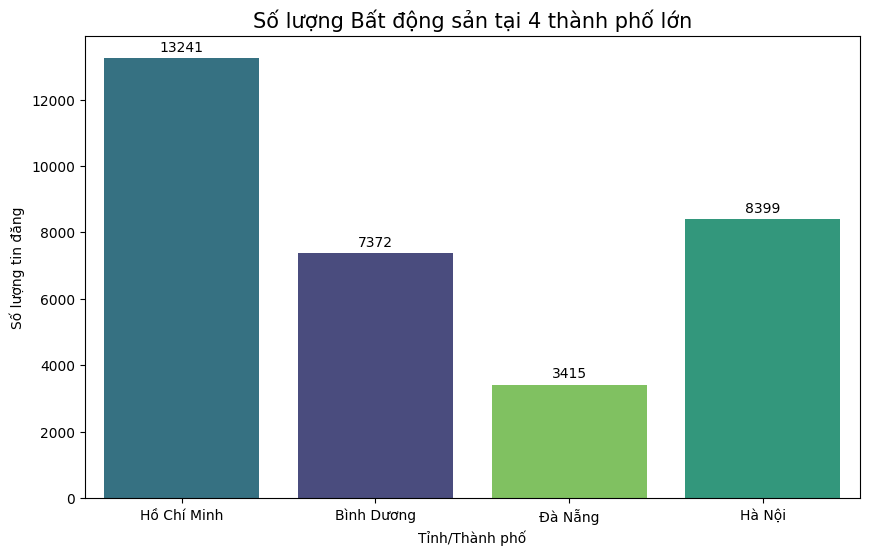

In [63]:
target_provinces = ["Hồ Chí Minh", "Bình Dương", "Đà Nẵng", "Hà Nội"]

df_filtered = df[df["province"].isin(target_provinces)]

print(df_filtered["province"].value_counts())

plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df_filtered,
    x="province",
    hue="province",
    legend=False,
    order=target_provinces,
    palette="viridis"
)

plt.title("Số lượng Bất động sản tại 4 thành phố lớn", fontsize=15)
plt.xlabel("Tỉnh/Thành phố")
plt.ylabel("Số lượng tin đăng")

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()


In [ ]:
plt.figure(figsize=(15, 6))

ax = sn

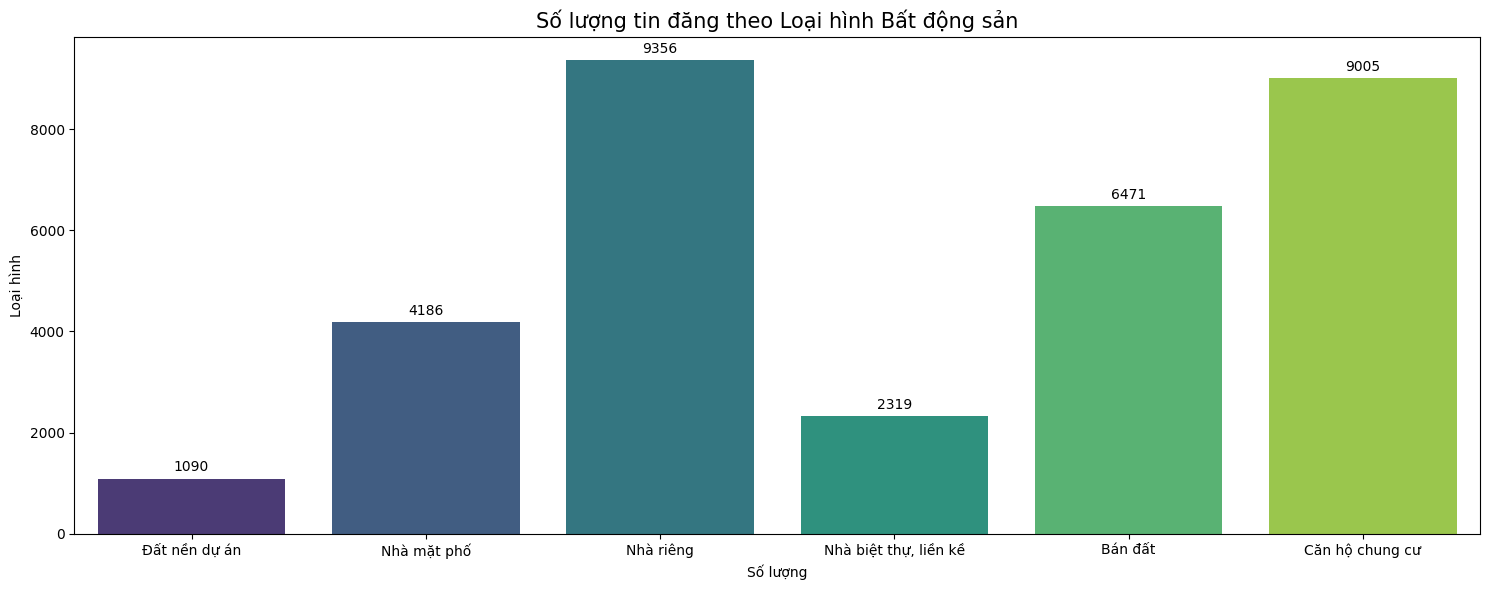

In [64]:

plt.figure(figsize=(15, 6))

ax = sns.countplot(
    data=df_filtered,
    x="category",
    hue="category",
    legend=False,
    # order=target_provinces,
    palette="viridis"
)

plt.title("Số lượng tin đăng theo Loại hình Bất động sản", fontsize=15)
plt.xlabel("Số lượng")
plt.ylabel("Loại hình")

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout() 
plt.show()

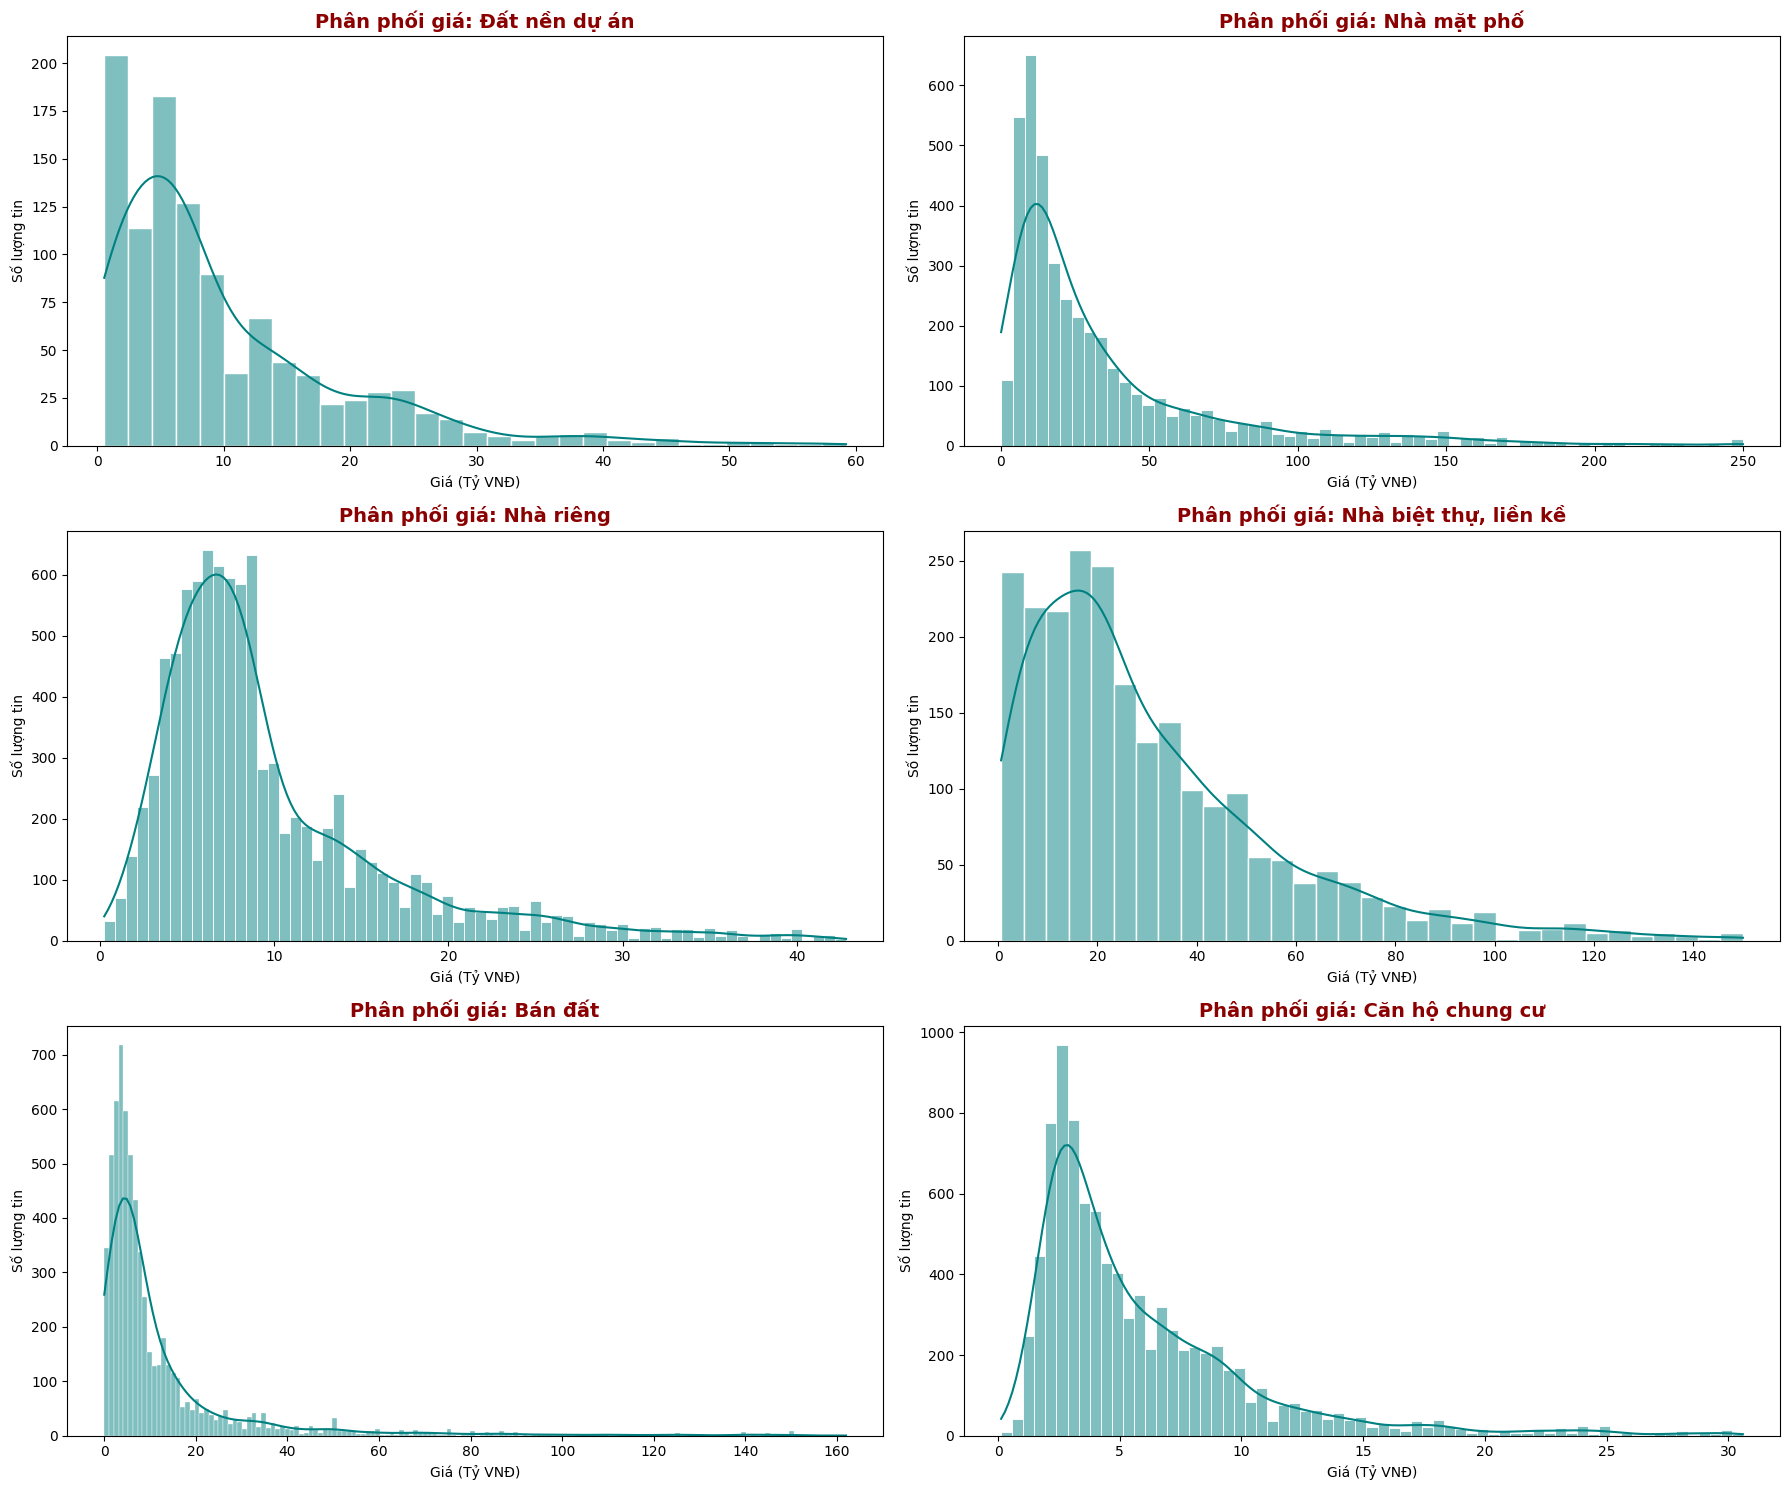

In [65]:
categories = df["category"].unique()
num_cats = len(categories)

n_cols = 2
n_rows = math.ceil(num_cats / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, cat in enumerate(categories):
    subset = df[df["category"] == cat]

    sns.histplot(
        data=subset,
        x="price_billion",
        kde=True,
        ax=axes[i],
        color="teal",
        edgecolor="white"
    )

    axes[i].set_title(f'Phân phối giá: {cat}', fontsize=14, fontweight='bold', color='darkred')
    axes[i].set_xlabel('Giá (Tỷ VNĐ)')
    axes[i].set_ylabel('Số lượng tin')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

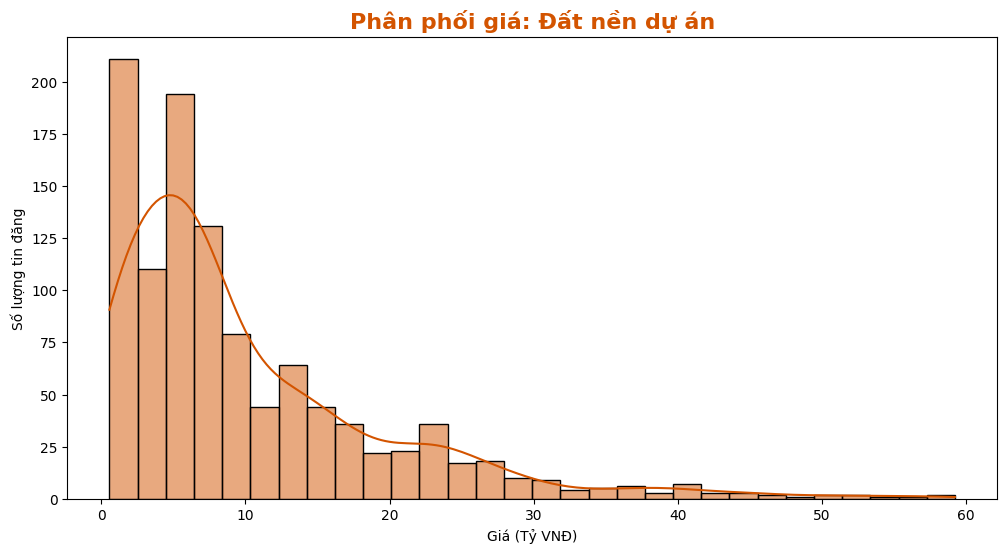

In [66]:
target_cat = "Đất nền dự án"
subset = df[df['category'] == target_cat]

plt.figure(figsize=(12, 6))
sns.histplot(data=subset, x='price_billion', kde=True, color='#d35400', bins=30)

plt.title(f'Phân phối giá: {target_cat}', fontsize=16, color='#d35400', fontweight='bold')
plt.xlabel('Giá (Tỷ VNĐ)')
plt.ylabel('Số lượng tin đăng')
plt.show()

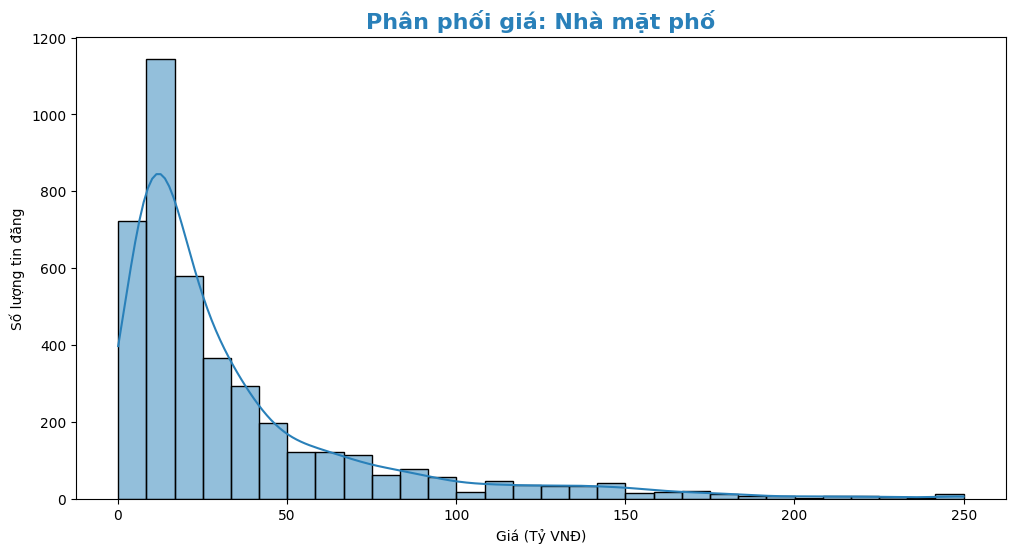

In [67]:
target_cat = "Nhà mặt phố"
subset = df[df['category'] == target_cat]

plt.figure(figsize=(12, 6))
sns.histplot(data=subset, x='price_billion', kde=True, color='#2980b9', bins=30)

plt.title(f'Phân phối giá: {target_cat}', fontsize=16, color='#2980b9', fontweight='bold')
plt.xlabel('Giá (Tỷ VNĐ)')
plt.ylabel('Số lượng tin đăng')
plt.show()

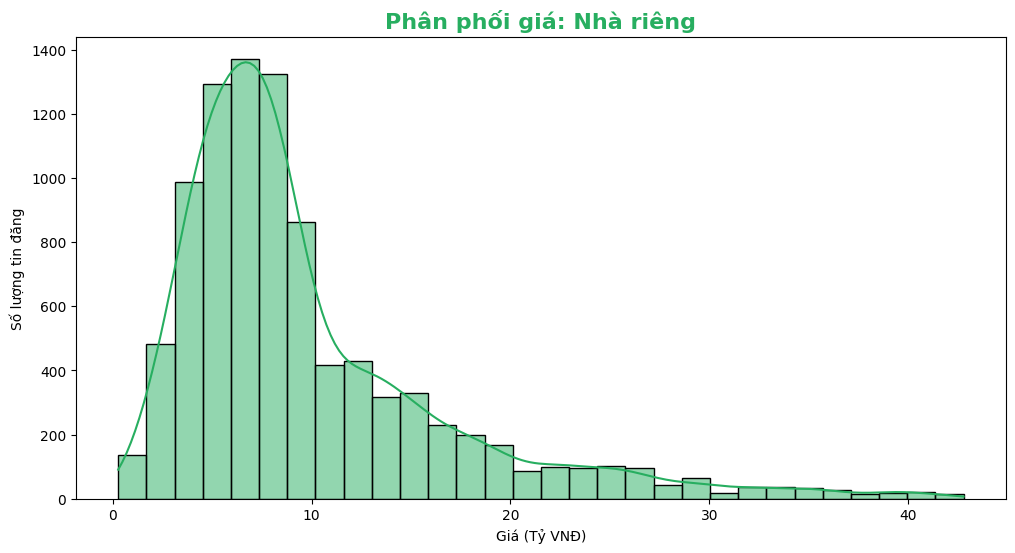

In [68]:
target_cat = "Nhà riêng" 
subset = df[df['category'] == target_cat]

plt.figure(figsize=(12, 6))
sns.histplot(data=subset, x='price_billion', kde=True, color='#27ae60', bins=30)

plt.title(f'Phân phối giá: {target_cat}', fontsize=16, color='#27ae60', fontweight='bold')
plt.xlabel('Giá (Tỷ VNĐ)')
plt.ylabel('Số lượng tin đăng')
plt.show()

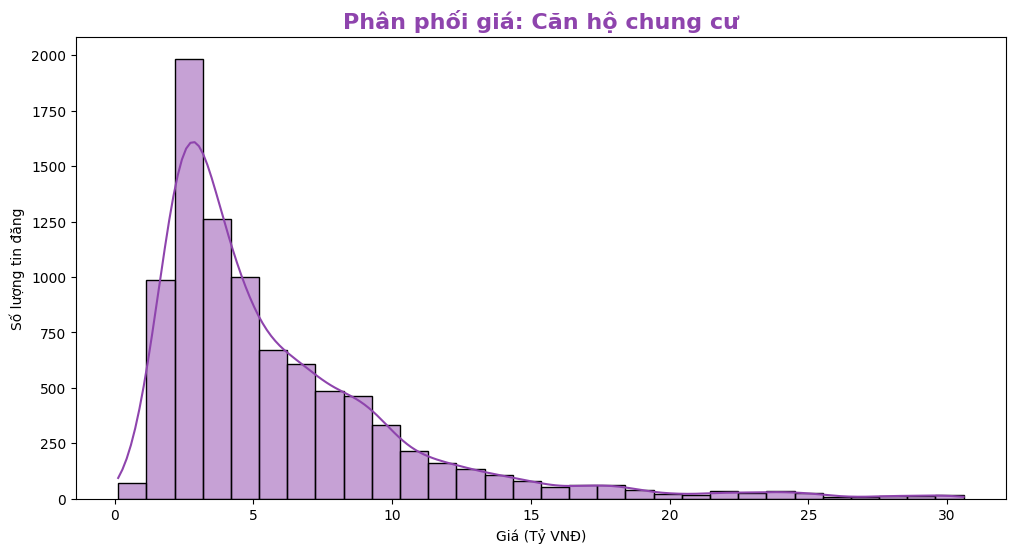

In [69]:
target_cat = "Căn hộ chung cư"
subset = df[df['category'] == target_cat]

plt.figure(figsize=(12, 6))
sns.histplot(data=subset, x='price_billion', kde=True, color='#8e44ad', bins=30)

plt.title(f'Phân phối giá: {target_cat}', fontsize=16, color='#8e44ad', fontweight='bold')
plt.xlabel('Giá (Tỷ VNĐ)')
plt.ylabel('Số lượng tin đăng')
plt.show()

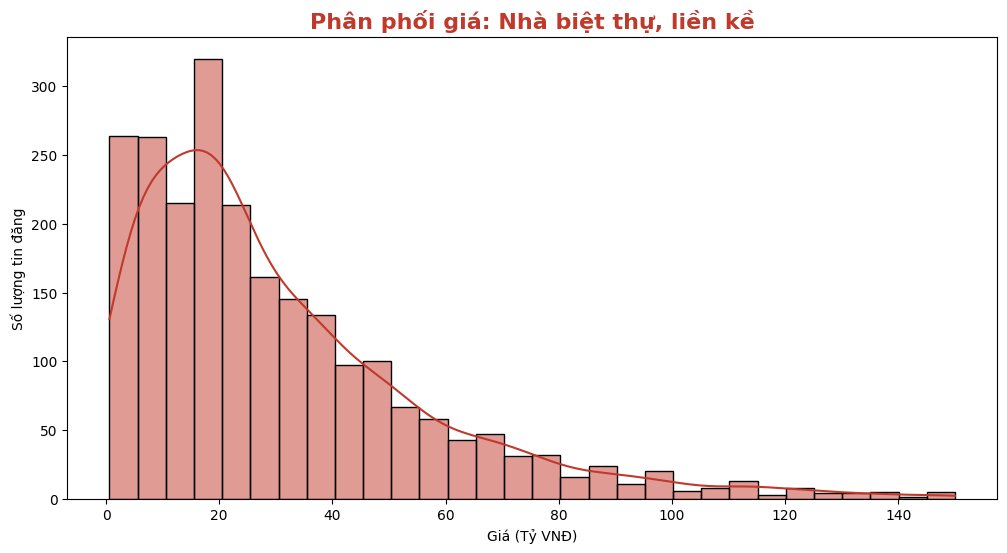

In [70]:
target_cat = "Nhà biệt thự, liền kề"
subset = df[df['category'] == target_cat]

plt.figure(figsize=(12, 6))
sns.histplot(data=subset, x='price_billion', kde=True, color='#c0392b', bins=30)

plt.title(f'Phân phối giá: {target_cat}', fontsize=16, color='#c0392b', fontweight='bold')
plt.xlabel('Giá (Tỷ VNĐ)')
plt.ylabel('Số lượng tin đăng')
plt.show()

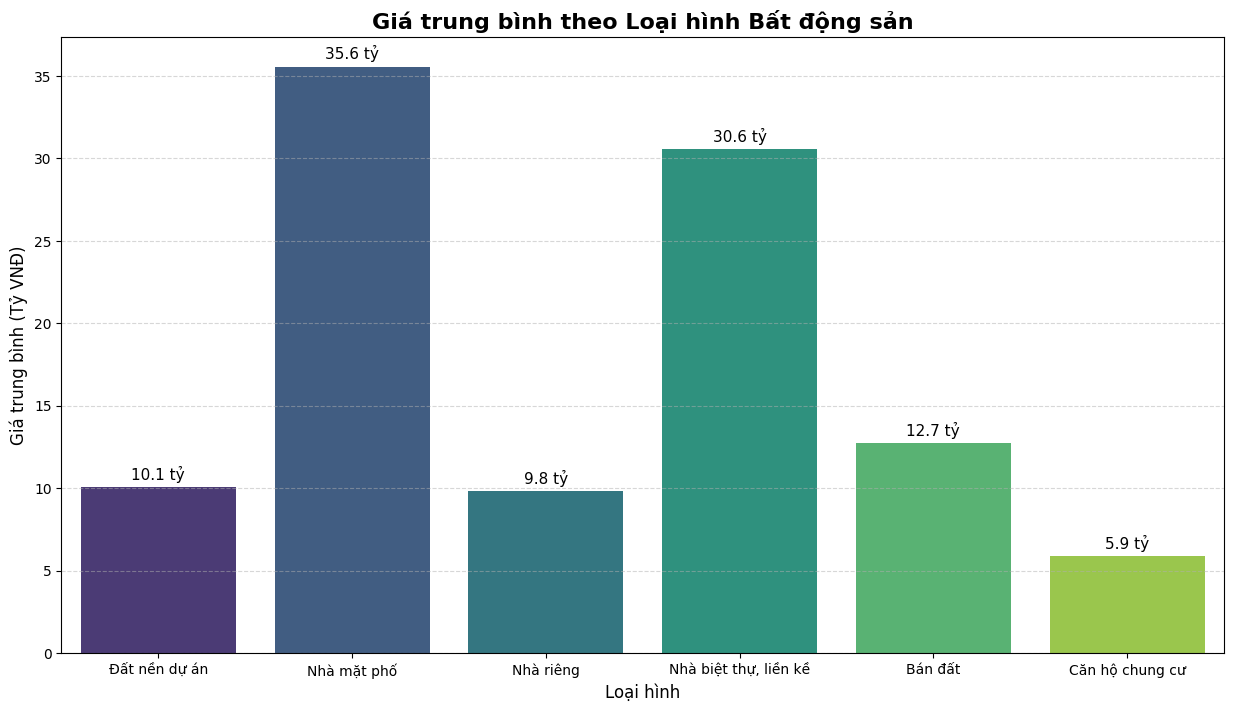

In [71]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(
    data=df,
    x="category",
    y="price_billion",
    hue="category",
    palette="viridis",
    errorbar=None,
    estimator="mean"
)

plt.title('Giá trung bình theo Loại hình Bất động sản', fontsize=16, fontweight='bold')
plt.xlabel('Loại hình', fontsize=12)
plt.ylabel('Giá trung bình (Tỷ VNĐ)', fontsize=12)
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f tỷ', padding=3, fontsize=11)

plt.show()

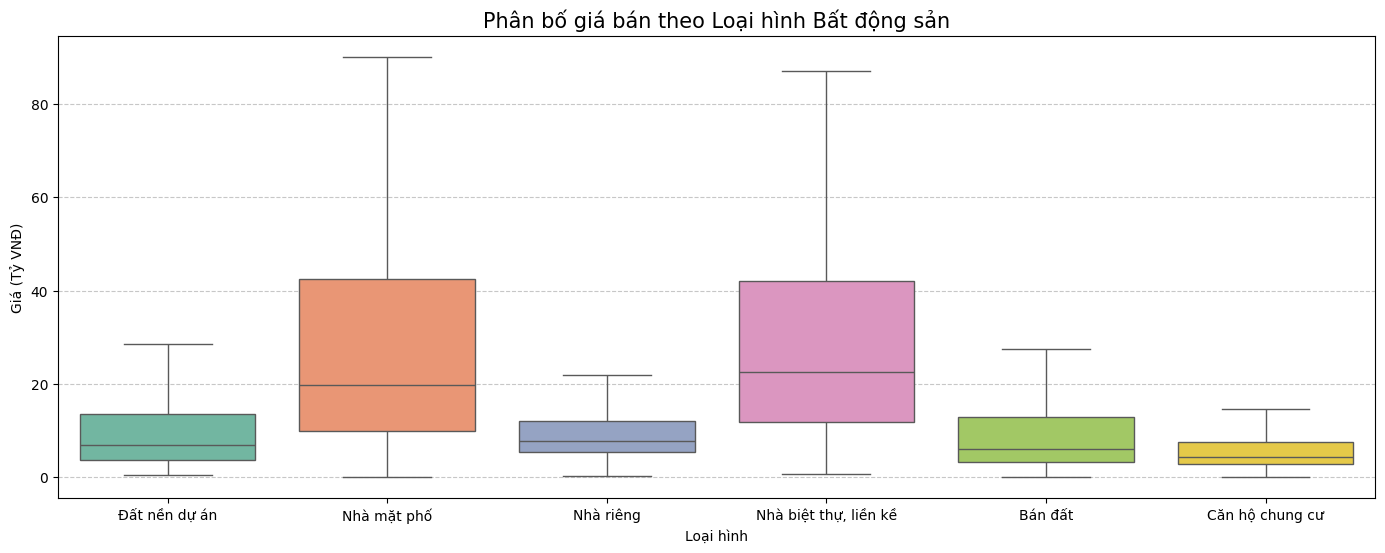

In [72]:
plt.figure(figsize=(17, 6))

sns.boxplot(
    data=df,
    x="category",
    y="price_billion",
    hue="category",
    palette="Set2",
    legend=False,
    showfliers=False
)

plt.title("Phân bố giá bán theo Loại hình Bất động sản", fontsize=15)
plt.xlabel("Loại hình")
plt.ylabel("Giá (Tỷ VNĐ)")
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()